# Malicious ClusterScan

Describes/summarizes the or set of clusters. Useful for when you aim to enlist the summarized malware types found in each cluster in order by Type # as presented in VirusTotal such that the first ones on the list per cluster are Type 1 (most popular), followed by Type 2 then Type 3 (least popular).

Note that this notebook only makes use of the verified xxxx_SampleHash_Common.csv file which represents a significant majority of the entire Oliveira dataset.  

## Import Libraries/Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.rcParams["figure.autolayout"] = True

malicious_df = pd.read_csv('./Clean_Manual_DBSCAN_woFalseLabel_SampleHash_Common.csv', low_memory=False, index_col=False) #This should point to a VirusTotal verified <Data Clustering>_SampleHash_Common.csv file

#Load list of API calls
API_LIST = "../api_calls.txt"
DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

def list_to_str(ls:list):
    output = ""
    for l in ls:
        output += str(l) + " "
    return output[0:len(output)-1]

def inject_patterns(inner_df:pd.DataFrame):
    patterns = []
    for row in range(inner_df.shape[0]):
        patterns.append(list_to_str(inner_df.iloc[row,2:5].transpose().to_list()))
    inner_df['type_pattern'] = patterns
    return inner_df

def get_unique_clusters(df:pd.DataFrame):
    return list(df['cluster'].unique())

def get_summary(df:pd.DataFrame):
    #Identify the overall list of types each cluster is as designated by VirusTotal.
    unique_clusters = get_unique_clusters(df)
    summary = []
    for u in unique_clusters:
        cluster_sublist = [u]
        df_copy = malicious_df[malicious_df['cluster'] == u].copy(deep=True)
        idx = list(df_copy['Type 1'].value_counts().index)
        counts = list(df_copy['Type 1'].value_counts())
        type_sublist = []
        for i in range(len(idx)):
            type_sublist.append([idx[i], counts[i]])
        cluster_sublist.append(type_sublist)
        # str_summary = []
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts().index))
        # cluster_sublist.append(list(df_copy['type_pattern'].value_counts()))
        summary.append(cluster_sublist)
    return summary

DELIMITER = "NaN"
API_FILE = open(API_LIST,"r")
APIS = API_FILE.readline().split(',')
APIS.append(DELIMITER) #serves as a label for NaN values for Instance-based datasets
API_FILE.close()

from sklearn.preprocessing import LabelEncoder
#Inverse Label Encoding
def inverse_label(item):
    global APIS
    return item.map(lambda x: APIS[int(x)])
oliveira = pd.read_csv('../oliveira.csv', low_memory=False)
oliveira.iloc[:, 1:101] = oliveira.iloc[:, 1:101].apply(inverse_label, axis=1, result_type='reduce')

def how_many_clusters():
    c = malicious_df['cluster'].unique()
    c.sort()
    print("Number of Clusters:", c.size)
    c = malicious_df['cluster'].value_counts(ascending=True)
    print("Number of single-item Clusters:", c[c==1].count())

C:\Users\ejose\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## DataFrame Preview

,cluster,hash,Type 1,Type 2,Type 3,pattern
0,0,071e8c3f8922e186e57548cd4c703a5d,trojan,_,_,"RegOpenKeyExA,NtOpenKey,NtQueryValueKey,NtClos..."
1,1,33f8e6d08a6aae939f25a8e0d63dd523,pua,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
2,2,b68abd064e975e1c6d5f25e748663076,trojan,_,_,"SetUnhandledExceptionFilter,OleInitialize,LdrL..."
3,3,72049be7bd30ea61297ea624ae198067,trojan,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."
4,4,c9b3700a77facf29172f32df6bc77f48,trojan,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
5,5,cc6217be863e606e49da90fee2252f52,trojan,_,_,"LdrGetProcedureAddress,NtAllocateVirtualMemory..."
6,6,f7a1a3c38809d807b3f5f4cc00b1e9b7,downloader,_,_,"NtClose,NtOpenKey,NtQueryValueKey,NtClose,NtOp..."
7,7,164b56522eb24164184460f8523ed7e2,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
8,8,56ae1459ba61a14eb119982d6ec793d7,adware,_,_,"GetSystemTimeAsFileTime,LdrLoadDll,LdrGetProce..."
9,9,c4148ca91c5246a8707a1ac1fd1e2e36,downloader,_,_,"GetSystemTimeAsFileTime,NtAllocateVirtualMemor..."


(40897, 6)

<Axes: ylabel='Type 1'>

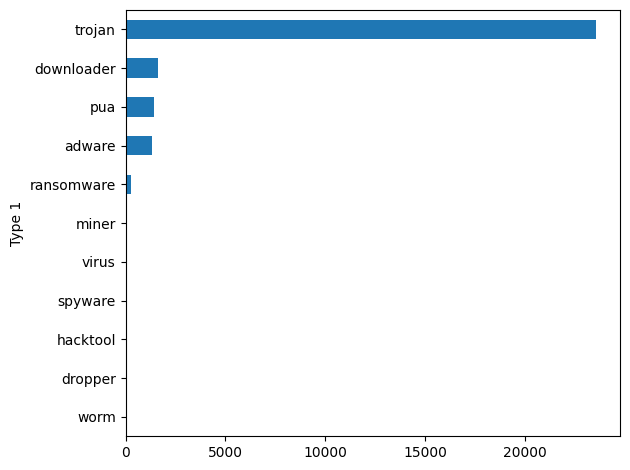

In [2]:
#Replace '-' empty malware type delimiter with '_' for consistency
malicious_df.replace(to_replace='-',value='_', inplace=True)
display(malicious_df.head(10))
display(malicious_df.shape)
malicious_df['Type 1'].value_counts(ascending=True).plot(kind='barh')

In [3]:
#Inject pattern (i.e., summarized malware type pattern) to the DataFrame
malicious_df = inject_patterns(malicious_df)

#Drop row that is falsely labelled. (i.e. '_' on all popularity levels of VirusTotal)
malicious_df.drop(malicious_df[(malicious_df['Type 1']=='_')].index, inplace=True)

In [4]:
# DROP CLUSTERS WITH MORE THAN 1 MALWARE TYPE UNDER IT
# unique_clusters = get_unique_clusters(malicious_df)
# for u in unique_clusters:
#     if len(malicious_df[malicious_df['cluster'] == u]['Type 1'].unique()) > 1:
#         malicious_df = malicious_df.drop(malicious_df[malicious_df['cluster'] == u].index)
# malicious_df.head()

## How many clusters are there?

In [5]:
how_many_clusters()

Number of Clusters: 11841
Number of single-item Clusters: 9821


In [6]:
#DROP ROWS WITH NA TO HAVE CLEAN CLUSTERS
import numpy as nan
malicious_df.dropna(inplace=True, subset=['Type 1'])
malicious_df['Type 1'].unique()

array(['trojan', 'pua', 'downloader', 'adware', 'hacktool', 'miner',
       'virus', 'spyware', 'ransomware', 'dropper', 'worm'], dtype=object)

In [7]:
how_many_clusters()

Number of Clusters: 8665
Number of single-item Clusters: 7246


## "What Malware Types can be found in the overall dataset?"

### This is regardless of cluster.

Type 1
trojan        23557
downloader     1617
pua            1408
adware         1325
ransomware      250
miner            97
virus            55
spyware          36
hacktool          5
dropper           4
worm              2
Name: count, dtype: int64

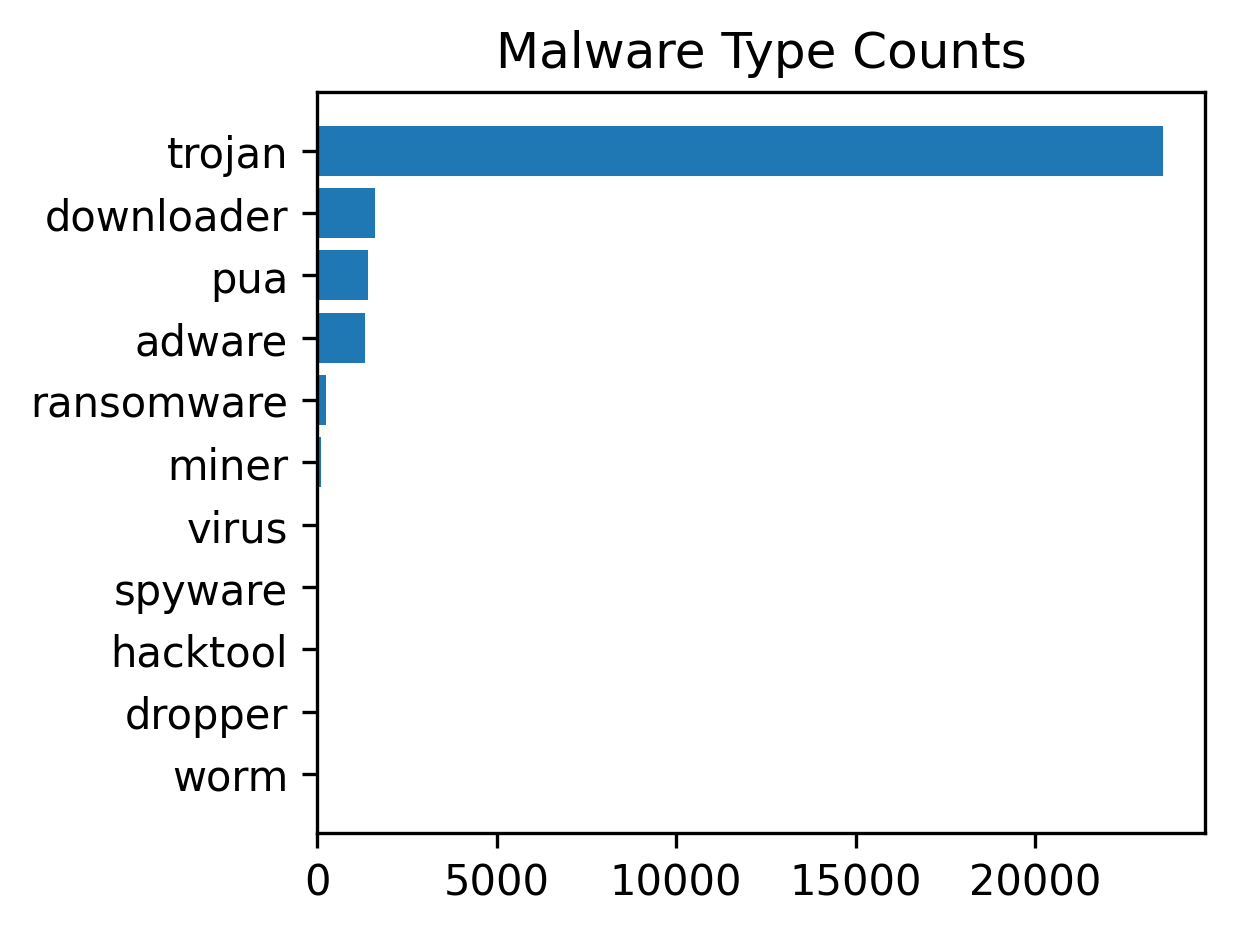

In [8]:
output = malicious_df['Type 1'].value_counts()
str_output = str(output) + "\n\n"
with open("./Output/1 MalwareTypes_in_Dataset.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
display(output)
fig, axs = plt.subplots(nrows=1, layout='constrained')
fig.set_figwidth(4)
fig.set_figheight(3)
fig.set_dpi(300)
axs.set_title('Malware Type Counts')
axs.barh(malicious_df['Type 1'].value_counts().index, malicious_df['Type 1'].value_counts())
axs.invert_yaxis()
# axs[1].set_title('Type 2 Malware Type Counts')
# axs[1].invert_yaxis()
# axs[1].barh(malicious_df['Type 2'].value_counts().index, malicious_df['Type 2'].value_counts())
# axs[2].invert_yaxis()
# axs[2].set_title('Type 3 (Least \'Popular\') Malware Type Counts')
# axs[2].barh(malicious_df['Type 3'].value_counts().index, malicious_df['Type 3'].value_counts())
plt.savefig("./Output/1 Popular Malware Types in Dataset.png")

## "What Malware Types are there in each cluster?"


### Identify the counts of Malware Types per Cluster

This indicates the malware types (including the # of instances) found in each cluster.

In [9]:
str_output = ""
summary = get_summary(malicious_df)
summary.sort()
for s in summary:
    str_output += f"CLUSTER {s[0]}: "
    for t in s[1]:
        str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 2: "
    # for t in s[2]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tType 3: "
    # for t in s[3]:
    #     str_output += f"{t[0]} ({t[1]}); "
    # str_output += "\n\tMost Popular Malware Type Combination (in order Most to Least):\n"
    # for i,t in enumerate(s[4]):
    #     str_output += f"\t    {i+1} {t:12s} ({s[5][i]})\n"
    str_output += "\n"
with open("./Output/1 MalwareType_per_Cluster.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

CLUSTER 0: trojan (1902); downloader (131); adware (111); pua (108); ransomware (27); miner (6); virus (5); spyware (3); 
CLUSTER 1: trojan (69); downloader (6); pua (5); adware (4); 
CLUSTER 2: trojan (6); 
CLUSTER 3: trojan (1); 
CLUSTER 4: trojan (1); 
CLUSTER 5: trojan (1); 
CLUSTER 6: trojan (93); downloader (10); pua (5); adware (3); ransomware (1); 
CLUSTER 7: adware (1); 
CLUSTER 8: trojan (276); adware (26); pua (19); downloader (14); miner (2); spyware (1); ransomware (1); 
CLUSTER 9: trojan (659); downloader (53); pua (43); adware (42); ransomware (4); virus (2); 
CLUSTER 10: trojan (19); pua (5); hacktool (2); 
CLUSTER 11: trojan (4); 
CLUSTER 12: trojan (1); 
CLUSTER 13: trojan (191); pua (22); downloader (16); adware (12); ransomware (1); 
CLUSTER 14: trojan (13); adware (1); 
CLUSTER 15: trojan (8); 
CLUSTER 16: trojan (1); 
CLUSTER 17: trojan (406); downloader (40); pua (24); adware (22); miner (3); ransomware (2); virus (1); 
CLUSTER 18: trojan (1); downloader (1); 
CL

### Identify the Clusters that have the same Unique Malware Type

This indicates what clusters have verified malicious samples that match specific Malware Types.

This indicates the most occuring Malware Type which extends to the most 'popular' malware type that is probably found in the dataset.

Such findings may also be used as a reflection as to what malware types are most prevalent in the wild.

In [10]:
# Summarize Clusters that have the same malware types as per VirusTotal.
str_output = f"# of Unique Malware Type: {len(malicious_df['Type 1'].unique())}" + "\n\n"

cluster_instance_summary = [0] * len(list(malicious_df['cluster'].unique()))
count_summary = []
for i, u in enumerate(list(malicious_df['Type 1'].unique())):
    matching = malicious_df[malicious_df['Type 1'] == u]['cluster']
    count_summary.append([u, len(list(matching)), len(list(matching.unique())) ,str(list(matching.unique()))])
    str_output += f"Unique Malware Type: {i+1}".upper() + "\n"
    str_output += f"Malware Type: {u}" + "\n"
    str_output += f"Matching Clusters Count: {len(list(matching.unique()))}" + "\n"
    str_output += f"Matching Clusters: {list(matching.unique())}" + "\n"
    str_output += "\n"
with open("./Output/1 Clusters_on_Unique_MalwareType.txt", 'w') as f:
    f.write(str_output)
    f.flush
    f.close()
print(str_output)

count_summary.sort(key=lambda x: x[1])
count_summary = pd.DataFrame(count_summary, columns=['Malware Type', 'No. of Matching Verified Samples', 'No. of Matching Clusters', "Matching Clusters"])

count_summary.sort_values(by='No. of Matching Clusters',ascending=False, inplace=True)
display("Top 10 Most Common Malware Type (by Cluster Count)")
display(count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10])
count_summary[['Malware Type','No. of Matching Clusters', 'Matching Clusters']].iloc[0:10].to_csv("./Output/1 10_Most_Common_MalwareType_byClusterCount.csv", index=False)

# of Unique Malware Type: 11

UNIQUE MALWARE TYPE: 1
Malware Type: trojan
Matching Clusters Count: 7410
Matching Clusters: [0, 2, 3, 4, 5, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 30, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 8, 53, 9, 54, 55, 56, 59, 60, 61, 62, 63, 66, 67, 68, 69, 1, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 86, 88, 89, 90, 91, 93, 31, 95, 98, 100, 103, 104, 105, 99, 108, 109, 110, 111, 112, 113, 114, 115, 6, 117, 119, 120, 107, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 138, 139, 57, 140, 141, 142, 143, 145, 146, 147, 148, 149, 29, 150, 151, 152, 153, 154, 156, 157, 158, 159, 161, 162, 163, 164, 165, 167, 169, 170, 171, 172, 45, 173, 174, 176, 92, 177, 178, 179, 180, 181, 182, 184, 185, 187, 188, 189, 190, 191, 193, 81, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 137, 217, 218, 219, 220, 221, 222, 226, 228, 230, 231, 232, 233, 121, 234, 236, 2

'Top 10 Most Common Malware Type (by Cluster Count)'

,Malware Type,No. of Matching Clusters,Matching Clusters
10,trojan,7410,"[0, 2, 3, 4, 5, 11, 12, 13, 15, 16, 17, 18, 19..."
9,downloader,747,"[6, 9, 29, 34, 38, 45, 57, 65, 71, 81, 87, 106..."
8,pua,660,"[1, 28, 31, 33, 49, 0, 96, 13, 155, 186, 24, 2..."
7,adware,659,"[7, 8, 58, 92, 99, 107, 0, 60, 116, 9, 125, 13..."
6,ransomware,162,"[133, 0, 186, 37, 177, 327, 378, 57, 9, 573, 2..."
5,miner,70,"[72, 36, 265, 53, 121, 904, 221, 1315, 303, 76..."
4,virus,46,"[94, 36, 438, 121, 0, 770, 983, 200, 31, 9, 18..."
3,spyware,30,"[101, 102, 55, 8, 52, 263, 1142, 107, 2842, 10..."
1,dropper,4,"[2779, 2783, 5125, 36]"
2,hacktool,4,"[10, 503, 2106, 146]"


## "What the API Calls are in each Malware Type"

In [11]:
malware_types = count_summary['Malware Type'].to_list()
malware_apis = []

pd.set_option("display.max_rows", None)

print("Top 10 API CALLS PER MALWARE TYPE")
for m in malware_types:
    hashes = malicious_df[malicious_df['Type 1'] == m]['hash'].to_list()
    complete = []
    for h in hashes:
        complete += oliveira[oliveira['hash']==h].iloc[0,1:101].to_list()
    ser = pd.Series(complete, name=m)
    ser.value_counts().to_csv(f"./Output/1_APICALL_{m}.csv")
    malware_apis.append(ser.unique().tolist())
    display(ser.value_counts())

Top 10 API CALLS PER MALWARE TYPE


trojan
LdrGetProcedureAddress               401786
LdrLoadDll                           226706
LdrGetDllHandle                      173600
RegOpenKeyExW                        140419
NtClose                              116374
LoadResource                         107172
FindResourceExW                      104887
RegQueryValueExW                     100151
RegCloseKey                           98500
NtAllocateVirtualMemory               94661
NtQueryValueKey                       54160
NtOpenKey                             53879
GetSystemMetrics                      46422
GetSystemTimeAsFileTime               40888
SetErrorMode                          28329
GetSystemInfo                         20890
NtFreeVirtualMemory                   20316
NtCreateFile                          19183
NtProtectVirtualMemory                18244
RegOpenKeyExA                         17731
NtDelayExecution                      17058
GetSystemWindowsDirectoryW            16021
LoadStringW              

downloader
LdrGetProcedureAddress               27971
LdrLoadDll                           15956
LdrGetDllHandle                      11899
RegOpenKeyExW                         9530
NtClose                               8096
LoadResource                          7096
FindResourceExW                       7000
RegQueryValueExW                      6746
RegCloseKey                           6596
NtAllocateVirtualMemory               6541
NtOpenKey                             3811
NtQueryValueKey                       3751
GetSystemMetrics                      3155
GetSystemTimeAsFileTime               2767
SetErrorMode                          1971
GetSystemInfo                         1478
NtFreeVirtualMemory                   1351
NtCreateFile                          1322
NtProtectVirtualMemory                1314
RegOpenKeyExA                         1175
RegQueryInfoKeyW                      1095
GetSystemWindowsDirectoryW            1068
NtMapViewOfSection                    1062


pua
LdrGetProcedureAddress               23893
LdrLoadDll                           13403
LdrGetDllHandle                      10512
RegOpenKeyExW                         8392
NtClose                               7112
LoadResource                          6555
FindResourceExW                       6412
RegQueryValueExW                      5942
RegCloseKey                           5831
NtAllocateVirtualMemory               5532
NtOpenKey                             3236
NtQueryValueKey                       3185
GetSystemMetrics                      2835
GetSystemTimeAsFileTime               2436
SetErrorMode                          1727
NtFreeVirtualMemory                   1212
GetSystemInfo                         1188
NtCreateFile                          1165
NtDelayExecution                      1064
NtProtectVirtualMemory                1052
LoadStringW                           1001
RegOpenKeyExA                          987
RegQueryInfoKeyW                       933
GetSyst

adware
LdrGetProcedureAddress               22666
LdrLoadDll                           13189
LdrGetDllHandle                       9371
RegOpenKeyExW                         7752
NtClose                               6541
LoadResource                          5991
FindResourceExW                       5770
RegQueryValueExW                      5537
NtAllocateVirtualMemory               5503
RegCloseKey                           5486
NtOpenKey                             3000
NtQueryValueKey                       2998
GetSystemMetrics                      2627
GetSystemTimeAsFileTime               2458
SetErrorMode                          1585
GetSystemInfo                         1260
NtFreeVirtualMemory                   1206
NtCreateFile                          1070
NtProtectVirtualMemory                1045
RegOpenKeyExA                         1044
NtDelayExecution                       906
GetSystemWindowsDirectoryW             883
SetUnhandledExceptionFilter            882
Draw

ransomware
LdrGetProcedureAddress               4191
LdrLoadDll                           2525
LdrGetDllHandle                      1760
NtClose                              1276
RegOpenKeyExW                        1268
LoadResource                         1196
FindResourceExW                      1134
NtAllocateVirtualMemory              1107
RegQueryValueExW                      892
RegCloseKey                           865
NtQueryValueKey                       626
NtOpenKey                             568
GetSystemMetrics                      553
SetErrorMode                          378
GetSystemTimeAsFileTime               375
GetSystemInfo                         255
NtFreeVirtualMemory                   230
NtProtectVirtualMemory                217
NtCreateFile                          213
GetSystemWindowsDirectoryW            210
GetSystemDirectoryW                   204
NtMapViewOfSection                    181
LoadStringW                           180
RegOpenKeyExA          

miner
LdrGetProcedureAddress               1715
LdrLoadDll                           1059
LdrGetDllHandle                       630
RegOpenKeyExW                         613
NtClose                               480
RegCloseKey                           434
RegQueryValueExW                      419
FindResourceExW                       409
LoadResource                          404
NtAllocateVirtualMemory               346
NtQueryValueKey                       237
NtOpenKey                             225
GetSystemMetrics                      201
GetSystemTimeAsFileTime               157
GetSystemInfo                         121
SetErrorMode                          114
NtProtectVirtualMemory                103
RegQueryInfoKeyW                       85
LoadStringW                            83
NtCreateFile                           82
GetSystemDirectoryW                    76
NtMapViewOfSection                     73
GetSystemWindowsDirectoryW             72
DrawTextExW                 

virus
LdrGetProcedureAddress               1033
LdrLoadDll                            567
LdrGetDllHandle                       460
NtClose                               315
RegOpenKeyExW                         301
LoadResource                          259
FindResourceExW                       258
RegCloseKey                           210
RegQueryValueExW                      210
NtAllocateVirtualMemory               205
NtOpenKey                             149
NtQueryValueKey                       142
GetSystemMetrics                      121
GetSystemTimeAsFileTime                80
SetErrorMode                           64
GetSystemInfo                          55
NtProtectVirtualMemory                 53
LoadStringW                            42
RegOpenKeyExA                          41
NtOpenProcess                          40
GetSystemWindowsDirectoryW             39
GetSystemDirectoryW                    36
DrawTextExW                            36
NtOpenKeyEx                 

spyware
LdrGetProcedureAddress               623
LdrLoadDll                           387
LdrGetDllHandle                      248
RegOpenKeyExW                        212
NtClose                              170
RegCloseKey                          155
LoadResource                         148
RegQueryValueExW                     147
FindResourceExW                      147
NtAllocateVirtualMemory              146
GetSystemMetrics                      75
NtQueryValueKey                       72
NtOpenKey                             71
GetSystemTimeAsFileTime               61
SetFilePointer                        48
SetErrorMode                          46
NtReadFile                            46
NtCreateFile                          36
RegOpenKeyExA                         34
GetSystemWindowsDirectoryW            30
NtMapViewOfSection                    30
GetSystemInfo                         29
LoadStringW                           27
NtProtectVirtualMemory                25
NtCreate

dropper
LdrGetProcedureAddress         67
LdrLoadDll                     42
LdrGetDllHandle                22
NtClose                        19
RegOpenKeyExW                  18
NtAllocateVirtualMemory        15
LoadResource                   14
RegCloseKey                    14
FindResourceExW                14
SetFilePointer                 13
GetSystemMetrics               13
NtReadFile                     13
GetSystemTimeAsFileTime        13
RegQueryValueExW               12
NtQueryValueKey                 7
NtOpenKey                       7
DrawTextExW                     6
NtDelayExecution                6
EnumWindows                     6
LoadStringW                     4
GetSystemInfo                   4
CoInitializeEx                  4
NtCreateFile                    4
SetUnhandledExceptionFilter     4
CreateThread                    3
WSAStartup                      3
SetErrorMode                    3
NtFreeVirtualMemory             2
OleInitialize                   2
RegOpe

hacktool
LdrGetProcedureAddress         63
LdrLoadDll                     36
NtAllocateVirtualMemory        33
NtClose                        32
LdrGetDllHandle                29
RegOpenKeyExW                  20
NtFreeVirtualMemory            17
LoadResource                   17
RegQueryValueExW               16
SetFilePointer                 16
NtReadFile                     14
FindResourceExW                14
NtCreateFile                   14
RegCloseKey                    11
NtQueryValueKey                11
NtOpenKey                      11
__exception__                  11
NtMapViewOfSection              9
GetSystemMetrics                8
NtCreateSection                 7
NtQuerySystemInformation        7
GetFileSize                     7
SetErrorMode                    7
LoadStringA                     6
timeGetTime                     5
GetSystemInfo                   4
GetSystemTimeAsFileTime         3
LoadStringW                     3
RegOpenKeyExA                   3
GetSy

worm
LdrGetProcedureAddress         40
LdrGetDllHandle                33
LdrLoadDll                     16
NtAllocateVirtualMemory        12
NtClose                        11
FindResourceExW                 9
LoadResource                    8
SetErrorMode                    7
NtQueryValueKey                 5
NtOpenKey                       5
GetSystemInfo                   4
LoadStringW                     4
NtQuerySystemInformation        4
GetSystemMetrics                4
RegOpenKeyExW                   3
GetSystemDirectoryW             2
GetFileAttributesExW            2
NtProtectVirtualMemory          2
WriteProcessMemory              2
GetSystemTimeAsFileTime         2
__exception__                   2
DrawTextExW                     2
IsDebuggerPresent               2
OleInitialize                   2
LookupAccountSidW               2
SetUnhandledExceptionFilter     1
NtCreateSection                 1
NtCreateFile                    1
FindFirstFileExW                1
GetNative

## "What the Unique API Calls are in each Malware Type"

In [12]:
for i,m in enumerate(malware_types):
    print(i, m)
    m_list = malware_apis[i]
    for j in range(len(malware_apis)):
        if j != i:
            for k in m_list[:]:
                if k in malware_apis[j]:
                    m_list.remove(k)
    print(m_list)
    print("\n")

0 trojan
['SetStdHandle', 'RegQueryInfoKeyA', 'SHGetSpecialFolderLocation', 'DeleteUrlCacheEntryA', 'UnhookWindowsHookEx', 'EnumServicesStatusA', 'GetKeyboardState', 'CryptGenKey', 'CryptExportKey', 'WSASocketW', 'CryptDecodeObjectEx', 'NtQueueApcThread', 'MessageBoxTimeoutW', 'SetFileInformationByHandle', 'GetFileInformationByHandleEx', 'GetAddrInfoW', 'RegDeleteValueA', 'InternetSetStatusCallback', 'InternetReadFile', 'HttpQueryInfoA', 'ObtainUserAgentString', 'InternetOpenUrlA', 'ControlService', 'GetUserNameExA', 'SendNotifyMessageW', 'NtDeleteKey', 'CertOpenStore']


1 downloader
['GetVolumePathNameW', 'StartServiceW', 'InternetGetConnectedState', 'CreateServiceW', 'StartServiceA', 'DeleteUrlCacheEntryW', 'InternetCrackUrlW', 'shutdown', 'MessageBoxTimeoutA', 'GetKeyState', 'CreateServiceA', 'Module32FirstW', 'Module32NextW']


2 pua
['bind', 'getsockname', 'NtReadVirtualMemory', 'RtlRemoveVectoredExceptionHandler', 'WSARecv', 'CopyFileExW', 'setsockopt', 'GetAsyncKeyState', 'NtSu